In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "../root/out_1ED582EB-116D-7D4A-ACD3-B1FDD875261D.root"

file = ROOT.TFile.Open(file_path)
tree = file.Get("jetTree")

n_entries = tree.GetEntries()
print(f"Number of entries in the tree: {n_entries}")

Number of entries in the tree: 136299


In [3]:
def wrap_angle(a):
    return ((a + np.pi) % (2*np.pi)) - np.pi

def signed_angle_between_normals(n1, n2, pref):
    n1 = np.asarray(n1, float); n1 /= np.linalg.norm(n1)
    n2 = np.asarray(n2, float); n2 /= np.linalg.norm(n2)
    pref = np.asarray(pref, float)

    cross = np.cross(n1, n2)
    dot   = np.dot(n1, n2)

    # unsigned angle (0..π)
    angle = np.arctan2(np.linalg.norm(cross), dot)

    # sign from triple product
    if np.dot(cross, pref) < 0:
        angle = -angle

    return wrap_angle(angle)


z_cut = 0.1
dpsi_events = []
flattened_dpsi = []
flattened_dpsi2 = []
flattened_dpsi3 = []
flattened_dpsi4 = []
flattened_dpsi5 = []
phi_events = []
for entry in range(n_entries):
    tree.GetEntry(entry)
    dpsi_jets = []
    for jet_i in range(len(tree.jet_pt)):
        if tree.jet_pt[jet_i] < 200: #or tree.jet_btag[jet_i] < 0.75:
            continue
        
        if len(tree.lund_psi_sd[jet_i]) >= 1 and len(tree.lund_psi_sd_secondary[jet_i]) >= 1:
            psi1 = tree.lund_psi_sd[jet_i][0]
            psi2 = tree.lund_psi_sd_secondary[jet_i][0]
            dpsi = psi2 - psi1
            flattened_dpsi.append(wrap_angle(dpsi))

            max_kt_index_p = int(np.argmax(tree.lund_kt_sd[jet_i]))
            max_kt_index_s = int(np.argmax(tree.lund_kt_sd_secondary[jet_i]))

            psi1 = tree.lund_psi_sd[jet_i][max_kt_index_p]
            psi2 = tree.lund_psi_sd_secondary[jet_i][max_kt_index_s]
            dpsi = psi2 - psi1
            flattened_dpsi5.append(wrap_angle(dpsi))

        if len(tree.lund_psi[jet_i]) >= 1 and len(tree.lund_psi_secondary[jet_i]) >= 1:
            psi1 = tree.lund_psi[jet_i][0]
            psi2 = tree.lund_psi_secondary[jet_i][0]
            dpsi2 = psi2 - psi1
            flattened_dpsi2.append(wrap_angle(dpsi2))
        
        #print(tree.lund_soft_x)
        if jet_i < len(tree.lund_hard_x) and jet_i < len(tree.lund_soft_x) and len(tree.lund_kt_sd[jet_i]) > 0 and len(tree.lund_kt_sd_secondary[jet_i]) > 0:

            max_kt_index_p = int(np.argmax(tree.lund_kt_sd[jet_i]))
            max_kt_index_s = int(np.argmax(tree.lund_kt_sd_secondary[jet_i]))

            px_h = tree.lund_hard_x[jet_i][max_kt_index_p]
            py_h = tree.lund_hard_y[jet_i][max_kt_index_p]
            pz_h = tree.lund_hard_z[jet_i][max_kt_index_p]

            px_s = tree.lund_soft_x[jet_i][max_kt_index_s]
            py_s = tree.lund_soft_y[jet_i][max_kt_index_s]
            pz_s = tree.lund_soft_z[jet_i][max_kt_index_s]

            n1 =[px_h, py_h, pz_h]
            n2 =[px_s, py_s, pz_s]
            pref = [tree.lund_pref_x[jet_i][max_kt_index_s], tree.lund_pref_y[jet_i][max_kt_index_s], tree.lund_pref_z[jet_i][max_kt_index_s]]

            dpsi = signed_angle_between_normals(n1, n2, pref)
            flattened_dpsi3.append(dpsi)

            px_h = tree.lund_hard_x[jet_i][0]
            py_h = tree.lund_hard_y[jet_i][0]
            pz_h = tree.lund_hard_z[jet_i][0]

            px_s = tree.lund_soft_x[jet_i][0]
            py_s = tree.lund_soft_y[jet_i][0]
            pz_s = tree.lund_soft_z[jet_i][0]

            n1 =[px_h, py_h, pz_h]
            n2 =[px_s, py_s, pz_s]
            pref = [tree.lund_pref_x[jet_i][0], tree.lund_pref_y[jet_i][0], tree.lund_pref_z[jet_i][0]]

            dpsi = signed_angle_between_normals(n1, n2, pref)
            flattened_dpsi4.append(dpsi)



[]

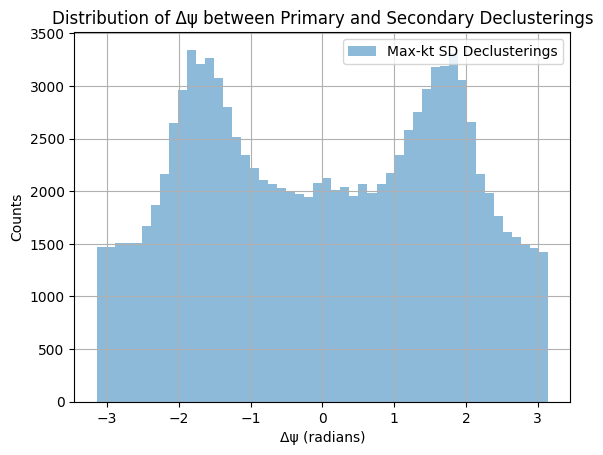

In [11]:
#plt.hist(flattened_dpsi, bins=50, range=(-np.pi,np.pi), label="SD Declusterings")
#plt.hist(flattened_dpsi2, bins=50, range=(-np.pi,np.pi), alpha=0.5, label="Primary Declusterings")
#plt.hist(flattened_dpsi3, bins=50, range=(-np.pi,np.pi), alpha=0.5, label="Hard vs Soft Branches")
#plt.hist(flattened_dpsi4, bins=50, range=(-np.pi,np.pi), alpha=0.5, label="Leading vs Subleading Branches")
plt.hist(flattened_dpsi5, bins=50, range=(-np.pi,np.pi), alpha=0.5, label="Max-kt SD Declusterings")
plt.legend()
plt.xlabel("Δψ (radians)")
plt.ylabel("Counts")
plt.title("Distribution of Δψ between Primary and Secondary Declusterings")
plt.grid(True)
plt.plot()


In [5]:
dpsi = np.array(flattened_dpsi)
cos2 = np.cos(2*dpsi)
C_eff = np.mean(cos2)
print(f"C_eff: {C_eff}")

C_eff: -0.316699083853741


****************************************
         Invalid FitResult  (status = 2 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1815.88
NDf                       =           45
Edm                       =  6.32308e-13
NCalls                    =          204
p0                        =      2197.44   +/-   0           
p1                        =    -0.312824   +/-   0           
p2                        =           10   +/-   0           
p3                        =            0   +/-   0           
p4                        =            0   +/-   0           


Warning in <TFile::Append>: Replacing existing TH1: dpsi_hist (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


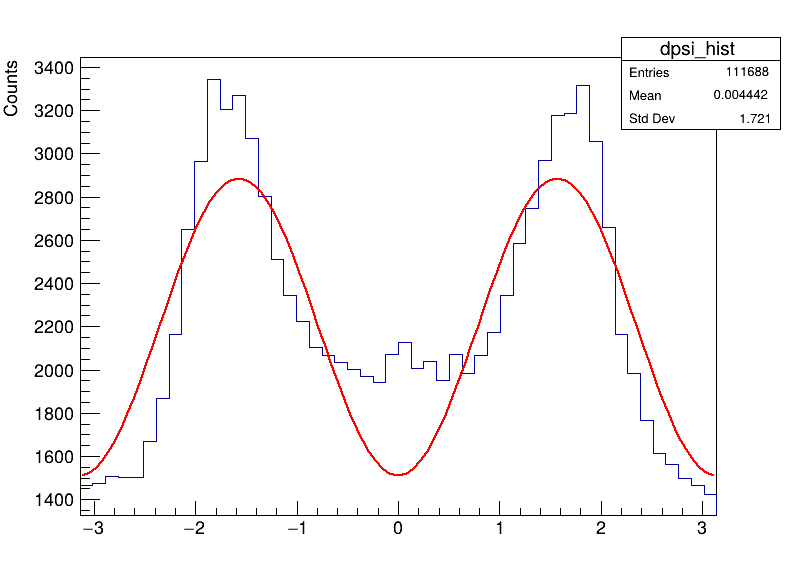

In [13]:
hist = ROOT.TH1F("dpsi_hist", "", 50, -np.pi, np.pi)
for dpsi in flattened_dpsi5:
    hist.Fill(dpsi)
def fit_function(x, par):
    return par[0] * (1 +par[1] * np.cos(2*x[0])) #+ par[2] * np.cos(4 * x[0]))
fit = ROOT.TF1("fit", fit_function, -np.pi, np.pi, 5)
fit.SetParameters(100, 10,10)
hist.Fit(fit, "R")
c1 = ROOT.TCanvas("c1", "PSI Distribution with Fit", 800, 600)
hist.Draw("")
hist.GetYaxis().SetTitle("Counts")
fit.Draw("same")
c1.Update()
c1.Draw()

